# Варіант 9 - Панченко Єгор

## Умова

Дано масив $T = \{(t_i)|t_i = (x_{i1}, x_{i2}, ..., x_{im}), i = 1, ..., N\}, x_{ij} ∈ R$, де
приклад $t_i$ характеризується $m$ ознаками. 

Задано кiлькiсть кластерiв $2 ≤ g ≤ N$. 

Розрахувати центри кластерiв за формулою (класичний метод $k$-середнiх):

$c_k = \frac{\sum_{i=1}^{N} u_{ki}t_i}{\sum_{i=1}^{N} u_{ki}}, k = 1, ...,g,$ де $U = \{(u_{ki})|k = 1, ..., g, i = 1, ..., N\}$ - випадковим чином задана матриця початкового розбиття, $u_{ki} ∈ {0, 1}, \sum_{i=1}^{g} u_{ki} = 1, \sum_{i=1}^{N} u_{ki} < N.$

  Перерахувати матрицю розбиття:
$u_{ki} = 1$, якщо $d(t_i, c_k) = min_{l = 1, ..., g} d(t_i, c_l)$,

$u_{ki} = 0$ в iншому випадку,
за умови, що $d(t_i, c_k)$ - евклiдова вiдстань мiж векторами.

Виконати декiлька iтерацiй з уточнення центрiв кластерiв.

### Розв'язок

In [414]:
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Функція, що вираховує центри нинішніх кластерів

In [415]:
def CalculateCenters(T, U):
    g, n = U.shape
    c = []
    
    for k in range(g):
        c.append(np.einsum('i,ij->j', U[k][:], T) / np.sum(U[k][:]))
                    
    c = np.array(c)
    return c

Перерахунок вагової матриці

In [416]:
def UpdateU(U, T, c):
    g, n = U.shape
    
    for k in range(g):
        for i in range(n):
            x = [np.linalg.norm(T[i] - c[l]) for l in range(g)]
            mn = min([np.linalg.norm(T[i] - c[l]) for l in range(g)])
                
            U[k][i] = 1 if np.linalg.norm(T[i] - c[k]) == mn else 0
                
    return U

### Usage example

По дефолту генеруємо $g$ блобів, але можна згенерувати просто рандомні точки. Потім генеруємо матрицю $U$

U:
 [[1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.]]


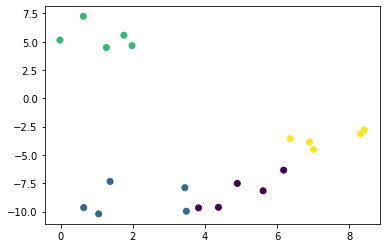

In [417]:
MakeBlobs = True
N = 20
M = 2
g = 4
T, clust
'''T = np.array([[1, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0], 
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 1]])'''

if MakeBlobs == True:
    T, clust = make_blobs(N, M, centers = g)
    T = np.array(T)
    if M == 2:
        plt.scatter(T[:, 0], T[:, 1], c = clust)
else:
    T = np.random.rand(N, M)
U
while True:
    U = np.random.rand(g, N)
    sm = np.zeros(g)
    for i in range(N):
        argm = np.argmax(U[:, i])
        U[:, i] = [0] * g
        U[argm, i] = 1
        sm[argm] = 1
    if sm.all():
        break
#print("T:\n", T, "\n")
print("U:\n", U)

Робимо ітерації по уточненню центрів

In [418]:
for times in range(5):
    print("Epoch ", times);
    cnew = CalculateCenters(T, U)
    #print("c:\n", cnew)
    Unew = UpdateU(U, T, cnew)
    
    #print("U:\n", Unew)
    
    c = cnew
    U = Unew

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4


Нижче кластеризація, отримана реалізованим алгоритмом

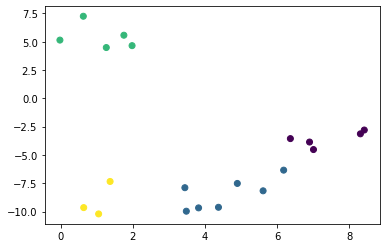

In [419]:
if M == 2 and MakeBlobs == True:
    px = T[:, 0]
    py = T[:, 1]
    col = clust
    add = [np.argmax(U[:, i]) for i in range(N)]
    plt.scatter(x = px, y = py, c = add)

Нижче кластеризація, отримана реалізованим алгоритмом з центрами відповідних кластерів. Також виводиться послідовність лейблів - до якого кластеру належить кожна з точок

[2 3 1 0 1 2 1 0 2 3 1 0 0 2 2 1 0 3 1 1 0 1 2 3]


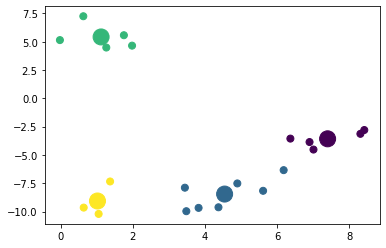

In [420]:
if M == 2 and MakeBlobs == True:
    px = np.hstack((T[:, 0], c[:, 0]))
    py = np.hstack((T[:, 1], c[:, 1]))
    add = [np.argmax(U[:, i]) for i in range(N)]
    col = np.hstack((add, np.array([i for i in range(g)])))
    s = np.hstack(([49 for i in range(len(add))], [256 for i in range(g)]))
    print(col)
    plt.scatter(x = px, y = py, c = col, s = s)